In [ ]:
from numpy import log, sqrt, exp
import numpy as np
from numpy.random import standard_normal
from scipy.stats import norm
import matplotlib.pyplot as plt

In [ ]:
# Pricing a European option using Black-Scholes formula and Monte Carlo simulations
# Pricing a Barrier option using Monte Carlo simulations

S0 = 100     # spot price of the underlying stock today
K = 105      # strike at expiry
mu = 0.05    # expected return
sigma = 0.2  # volatility
r = 0.05     # risk-free rate
T = 1.0      # years to expiry
Sb = 110     # barrier

In [ ]:
# Function 1: Black-Scholes pricing formula for a European option
def BS_european_price(S0, K, T, r, sigma):
    d1 = (log(S0 / K) + (r + 0.5 * sigma**2) * T) / (sigma * sqrt(T))
    d2 = d1 - sigma * sqrt(T)
    c = S0 * norm.cdf(d1) - K * exp(-r * T) * norm.cdf(d2)
    p = K * exp(-r * T) * norm.cdf(-d2) - S0 * norm.cdf(-d1)
    return c, p

# Function 2: Monte Carlo pricing procedure for a European option
def MC_european_price(S0, K, T, r, mu, sigma, numSteps, numPaths):
    dt = T / numSteps
    exp_rt = np.exp(-r * T)
    paths = np.zeros((numSteps + 1, numPaths))
    paths[0] = S0

    call_payoffs = []
    put_payoffs = []

    for _ in range(numPaths):
        S = S0
        path = np.zeros(numSteps + 1)
        path[0] = S
        for step in range(1, numSteps + 1):
            Z = np.random.standard_normal()
            S *= np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z)
            path[step] = S
        call_payoff = np.maximum(S - K, 0)
        put_payoff = np.maximum(K - S, 0)
        call_payoffs.append(call_payoff)
        put_payoffs.append(put_payoff)
        paths[:, _] = path

    c = exp_rt * np.sum(call_payoffs) / numPaths
    p = exp_rt * np.sum(put_payoffs) / numPaths
    return c, p, paths

# Function 3: Monte Carlo pricing procedure for Barrier knock-in option
def MC_barrier_knockin_price(S0, Sb, K, T, r, mu, sigma, numSteps, numPaths):
    dt = T / numSteps
    exp_rt = exp(-r * T)
    call_payoffs = []
    put_payoffs = []

    for _ in range(numPaths):
        S = S0
        knocked_in = False
        for _ in range(numSteps):
            S *= exp((r - 0.5 * sigma**2) * dt + sigma * sqrt(dt) * standard_normal())
            if S >= Sb:
                knocked_in = True
                break
        if knocked_in:
            call_payoff = max(S - K, 0)
            put_payoff = max(K - S, 0)
            call_payoffs.append(call_payoff)
            put_payoffs.append(put_payoff)

    c = exp_rt * sum(call_payoffs) / len(call_payoffs) if call_payoffs else 0
    p = exp_rt * sum(put_payoffs) / len(put_payoffs) if put_payoffs else 0
    return c, p

# Define variable numSteps to be the number of steps for multi-step MC
# numPaths - number of sample paths used in simulations

numSteps = 12;
numPaths = 10000;

# 1 Black-Scholes pricing formula
call_BS_European_Price, putBS_European_Price = \
BS_european_price(S0, K, T, r, sigma)

# 2 one-step Monte Carlo pricing procedure for European option
callMC_European_Price_1_step, putMC_European_Price_1_step, MC_one_paths = \
MC_european_price(S0, K, T, r, mu, sigma, 1, numPaths)

# 3 multi-step Monte Carlo pricing procedure for European option
callMC_European_Price_multi_step, putMC_European_Price_multi_step, MC_multi_paths = \
MC_european_price(S0, K, T, r, mu, sigma, numSteps, numPaths)

# 4 one-step Monte Carlo pricing procedure for Barrier option
callMC_Barrier_Knockin_Price_1_step, putMC_Barrier_Knockin_Price_1_step = \
MC_barrier_knockin_price(S0, Sb, K, T, r, mu, sigma, 1, numPaths)

# 5 multi-step Monte Carlo pricing procedure for Barrier option
callMC_Barrier_Knockin_Price_multi_step, putMC_Barrier_Knockin_Price_multi_step = \
MC_barrier_knockin_price(S0, Sb, K, T, r, mu, sigma, numSteps, numPaths)

# 6 one-step Monte Carlo pricing procedure for 10% increased volatility Barrier option
callMC_Barrier_Knockin_Price_1_step_in, putMC_Barrier_Knockin_Price_1_step_in = \
MC_barrier_knockin_price(S0, Sb, K, T, r, mu, 1.1*sigma, 1, numPaths)

# 7 multi-step Monte Carlo pricing procedure for 10% increased volatility Barrier option
callMC_Barrier_Knockin_Price_multi_step_in, putMC_Barrier_Knockin_Price_multi_step_in = \
MC_barrier_knockin_price(S0, Sb, K, T, r, mu, 1.1*sigma, numSteps, numPaths)

# 8 one-step Monte Carlo pricing procedure for 10% decreased volatility Barrier option
callMC_Barrier_Knockin_Price_1_step_de, putMC_Barrier_Knockin_Price_1_step_de = \
MC_barrier_knockin_price(S0, Sb, K, T, r, mu, 0.9*sigma, 1, numPaths)

# 9 multi-step Monte Carlo pricing procedure for 10% decreased volatility Barrier option
callMC_Barrier_Knockin_Price_multi_step_de, putMC_Barrier_Knockin_Price_multi_step_de = \
MC_barrier_knockin_price(S0, Sb, K, T, r, mu, 0.9*sigma, numSteps, numPaths)

print('Black-Scholes price of an European call option is ' + str(call_BS_European_Price))
print('Black-Scholes price of an European put option is ' + str(putBS_European_Price), '\n')

print('One-step MC price of an European call option is ' + str(callMC_European_Price_1_step))
print('One-step MC price of an European put option is ' + str(putMC_European_Price_1_step))
print('Multi-step MC price of an European call option is ' + str(callMC_European_Price_multi_step))
print('Multi-step MC price of an European put option is ' + str(putMC_European_Price_multi_step), '\n')

print('One-step MC price of an Barrier call option is ' + str(callMC_Barrier_Knockin_Price_1_step))
print('One-step MC price of an Barrier put option is ' + str(putMC_Barrier_Knockin_Price_1_step))
print('Multi-step MC price of an Barrier call option is ' + str(callMC_Barrier_Knockin_Price_multi_step))
print('Multi-step MC price of an Barrier put option is ' + str(putMC_Barrier_Knockin_Price_multi_step), '\n')

print('One-step MC price of an Barrier call option with 10% increased volatility is ' + str(callMC_Barrier_Knockin_Price_1_step_in))
print('One-step MC price of an Barrier put option with 10% increased volatility is ' + str(putMC_Barrier_Knockin_Price_1_step_in))
print('Multi-step MC price of an Barrier call option with 10% increased volatility is ' + str(callMC_Barrier_Knockin_Price_multi_step_in))
print('Multi-step MC price of an Barrier put option with 10% increased volatility is ' + str(putMC_Barrier_Knockin_Price_multi_step_in), '\n')

print('One-step MC price of an Barrier call option with 10% decreased volatility is ' + str(callMC_Barrier_Knockin_Price_1_step_de))
print('One-step MC price of an Barrier put option with 10% decreased volatility is ' + str(putMC_Barrier_Knockin_Price_1_step_de))
print('Multi-step MC price of an Barrier call option with 10% decreased volatility is ' + str(callMC_Barrier_Knockin_Price_multi_step_de))
print('Multi-step MC price of an Barrier put option with 10% decreased volatility is ' + str(putMC_Barrier_Knockin_Price_multi_step_de))

Black-Scholes price of an European call option is 8.021352235143176
Black-Scholes price of an European put option is 7.9004418077181455 

One-step MC price of an European call option is 8.095542849072674
One-step MC price of an European put option is 7.912803961094574
Multi-step MC price of an European call option is 8.07156519034699
Multi-step MC price of an European put option is 8.035400660986292 

One-step MC price of an Barrier call option is 21.035810719582475
One-step MC price of an Barrier put option is 0.0
Multi-step MC price of an Barrier call option is 8.409357016222463
Multi-step MC price of an Barrier put option is 0.0 

One-step MC price of an Barrier call option with 10% increased volatility is 22.61585198428624
One-step MC price of an Barrier put option with 10% increased volatility is 0.0
Multi-step MC price of an Barrier call option with 10% increased volatility is 8.818022330092889
Multi-step MC price of an Barrier put option with 10% increased volatility is 0.0 

On

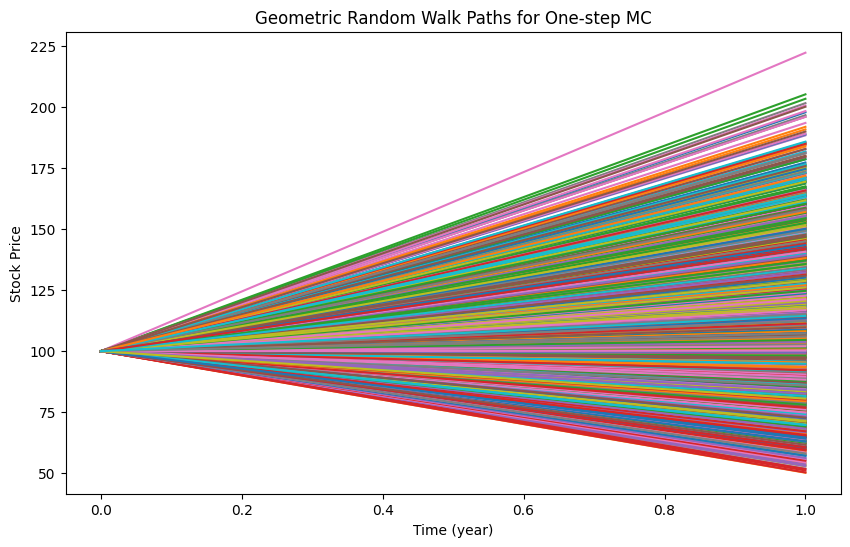

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(MC_one_paths)
plt.title('Geometric Random Walk Paths for One-step MC')
plt.xlabel('Time (year)')
plt.ylabel('Stock Price')
plt.show()

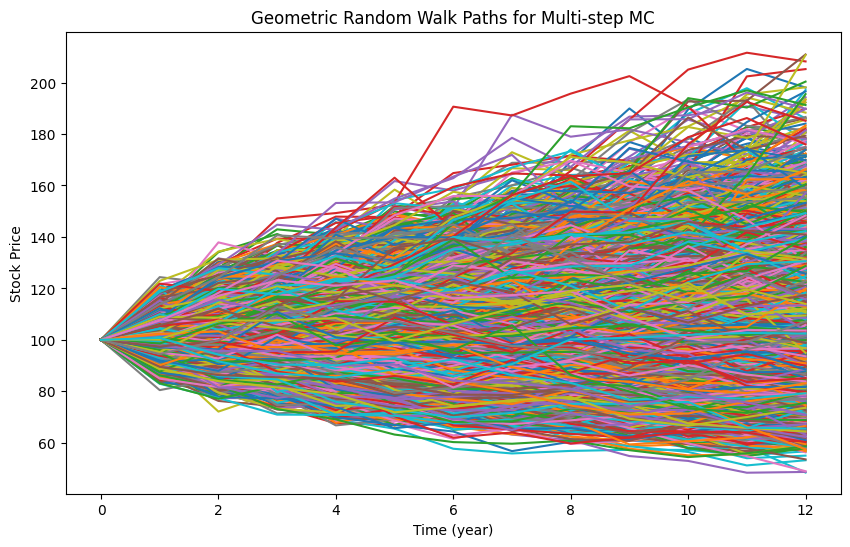

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(MC_multi_paths)
plt.title('Geometric Random Walk Paths for Multi-step MC')
plt.xlabel('Time (year)')
plt.ylabel('Stock Price')
plt.show()

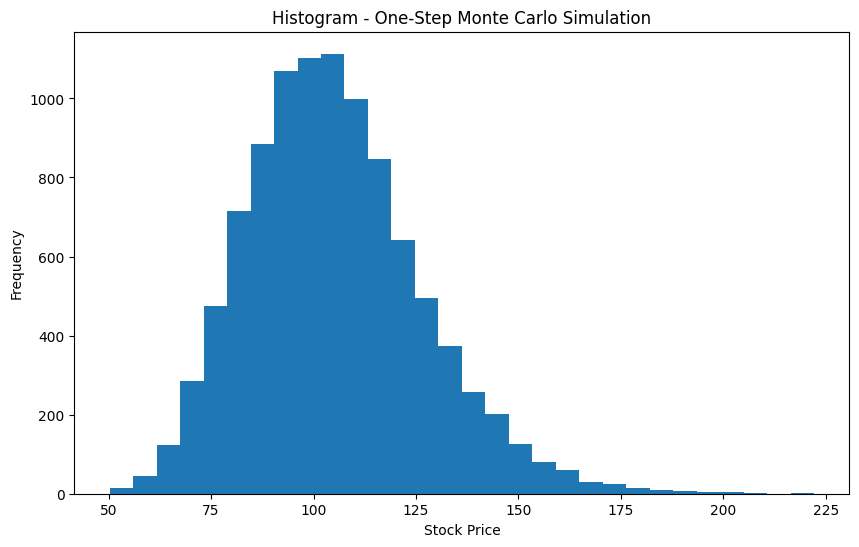

In [ ]:
final_prices_one_step = MC_one_paths[1, :]
plt.figure(figsize=(10, 6))
plt.hist(final_prices_one_step, bins=30)
plt.title('Histogram - One-Step Monte Carlo Simulation')
plt.xlabel('Stock Price')
plt.ylabel('Frequency')
plt.show()

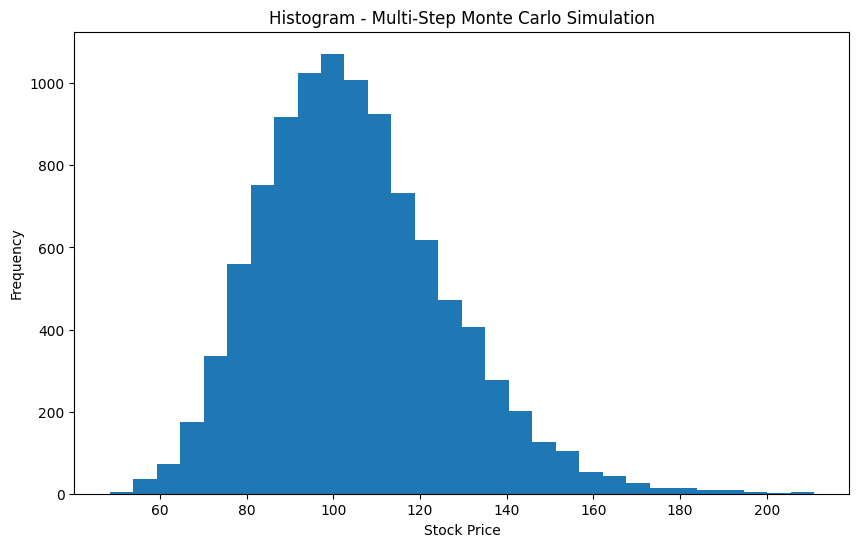

In [ ]:
final_prices_multi_step = MC_multi_paths[-1, :]
plt.figure(figsize=(10, 6))
plt.hist(final_prices_multi_step, bins=30)
plt.title('Histogram - Multi-Step Monte Carlo Simulation')
plt.xlabel('Stock Price')
plt.ylabel('Frequency')
plt.show()

In [ ]:
def MC_european_price_improved(S0, K, T, r, sigma, numSteps, numPaths):
    dt = T / numSteps
    exp_rt = exp(-r * T)
    call_payoffs = []
    put_payoffs = []

    for _ in range(numPaths):
        Z = standard_normal(numSteps)  # Generate random variables for steps
        Z_antithetic = -Z  # Antithetic variables

        # Simulate the path and its antithetic path
        for Z_current in [Z, Z_antithetic]:
            S = S0
            for step in range(numSteps):
                S *= exp((r - 0.5 * sigma**2) * dt + sigma * sqrt(dt) * Z_current[step])
            call_payoff = max(S - K, 0)
            put_payoff = max(K - S, 0)
            call_payoffs.append(call_payoff)
            put_payoffs.append(put_payoff)

    # Average the payoffs and discount back to present value
    c = exp_rt * np.mean(call_payoffs)
    p = exp_rt * np.mean(put_payoffs)
    return c, p

# Now call this improved function with a larger number of paths and steps
numPaths = 100000  # Increasing the number of paths
numSteps = 252  # Number of trading days in a year
call_price, put_price = MC_european_price_improved(S0, K, T, r, sigma, numSteps, numPaths)

print('Improved Multi-Step of an European call option is ' + str(call_price))
print('Improved Multi-Step of an European put option is ' + str(put_price), '\n')
print('Black-Scholes price of an European call option is ' + str(call_BS_European_Price))
print('Black-Scholes price of an European put option is ' + str(putBS_European_Price), '\n')

Improved Multi-Step of an European call option is 8.047205516301247
Improved Multi-Step of an European put option is 7.91640264422792 

Black-Scholes price of an European call option is 8.021352235143176
Black-Scholes price of an European put option is 7.9004418077181455 

